# Congestion Finder | Integration Example

This _Jupyter Notebook_ goes through all the steps of the _congestion finder_ module, with exception of the database connections. Each step builds on the output of the previous step. Therefore, this **Congestion Finder | Integration Example** documents the integration of all classes, objects and functions in the module. Together with the **Congestion Finder | Unit Example**, it serves as the documentation for the module and allows users to get familiar with the code.

## Initialization

The _Jupyter Notebook_ is initialised by loading all required modules and turning on logging. Additionally, several properties need to be set.

### Properties

Usually, the properties are set using a _properties file_. Here, we will define the directly.

In [1]:
date = "20171120"
roadNumber = 2
roadsFileName = "../tests/data/BPS_20171120.txt"
detectionsFileName = "../tests/data/A2_20171120.txt"
outputDirectory = "../tests/data"
speedThreshold = 65
flowThreshold = 40
spaceSmoothing = 10
timeSmoothing = 20
patchSizeThreshold = 1000
marginSpace = spaceSmoothing  # always the same
marginTime = timeSmoothing  # always the same

### Imports

The following modules are required for this _Jupyter Notebook_. The _congestion finder_ module lives in the parent directory of this _documentation_ directory, so that directory needs to be appended to the _system path_ to be able to load the module.

In [2]:
import logging
import numpy
import matplotlib.pyplot
import sys
sys.path.append("../")
import congestionfinder
import congestionfinder.bpsdetector
import congestionfinder.road
import congestionfinder.detection
import congestionfinder.speedflow
import congestionfinder.congestion
import patchfinder.patch

### Logging

To see what is going on while the functions are called, logging is turned on. It is set to _debug_ level. This includes the timestamp at the millisecond level, so that the process time of each step can be seen.

In [3]:
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
formatter = logging.Formatter("%(asctime)s - %(levelname)s - %(message)s")
consoleHandler = logging.StreamHandler()
consoleHandler.setFormatter(formatter)
logger.addHandler(consoleHandler)

## Integrated Analysis

There are multiple steps involved in finding _congestion_. To find out more about the individual classes, please look at the **Congestion Finder | Unit Example**.

### BPS Detectors

The first step is to load the _road_ network. This is done by obtaining the set of all active _BPS detectors_. We first read a list of _BPS codes_ from a _CSV_ file. This list contains all _BPS detectors_ in the Netherlands, active on _2017/11/20_. It is, then, parsed into a set of _BPSDetector objects_.

In [4]:
bpsDetectors = congestionfinder.bpsdetector.readCSVToBPSDetectors(roadsFileName)

2018-01-08 11:17:59,688 - DEBUG - Starting readCSVToBPSDetectors()
2018-01-08 11:17:59,751 - DEBUG - Ending readCSVToBPSDetectors()


The following _BPSDetector objects_ have been found.

In [5]:
for bpsDetector in bpsDetectors:
    print(bpsDetector)

bpsCode: 10D00100A055D0070007 | roadNumber: 1 | hectometer: 40 | additionalMeters: 85
bpsCode: 10D00100A055D007000B | roadNumber: 1 | hectometer: 40 | additionalMeters: 85
bpsCode: 10D00100A055D007000F | roadNumber: 1 | hectometer: 40 | additionalMeters: 85
bpsCode: 10D00100B85ED0070007 | roadNumber: 1 | hectometer: 46 | additionalMeters: 94
bpsCode: 10D00100B85ED007000B | roadNumber: 1 | hectometer: 46 | additionalMeters: 94
bpsCode: 10D00100B85ED007000F | roadNumber: 1 | hectometer: 46 | additionalMeters: 94
bpsCode: 10D00100D05CD0070007 | roadNumber: 1 | hectometer: 52 | additionalMeters: 92
bpsCode: 10D00100D05CD007000B | roadNumber: 1 | hectometer: 52 | additionalMeters: 92
bpsCode: 10D00100D05CD007000F | roadNumber: 1 | hectometer: 52 | additionalMeters: 92
bpsCode: 10D00100D05CD0070013 | roadNumber: 1 | hectometer: 52 | additionalMeters: 92
bpsCode: 10D00100D05CD0070017 | roadNumber: 1 | hectometer: 52 | additionalMeters: 92
bpsCode: 10D00100DC02D0070007 | roadNumber: 1 | hectom

bpsCode: 10D00408E832D007000B | roadNumber: 4 | hectometer: 570 | additionalMeters: 50
bpsCode: 10D00408F419D0070007 | roadNumber: 4 | hectometer: 573 | additionalMeters: 25
bpsCode: 10D00408F419D007000B | roadNumber: 4 | hectometer: 573 | additionalMeters: 25
bpsCode: 10D004090C4BD0070007 | roadNumber: 4 | hectometer: 579 | additionalMeters: 75
bpsCode: 10D004090C4BD007000B | roadNumber: 4 | hectometer: 579 | additionalMeters: 75
bpsCode: 10D004091C2CD0070007 | roadNumber: 4 | hectometer: 583 | additionalMeters: 44
bpsCode: 10D004091C2CD007000B | roadNumber: 4 | hectometer: 583 | additionalMeters: 44
bpsCode: 10D004093014D0070007 | roadNumber: 4 | hectometer: 588 | additionalMeters: 20
bpsCode: 10D004093014D007000B | roadNumber: 4 | hectometer: 588 | additionalMeters: 20
bpsCode: 10D004094046D0070007 | roadNumber: 4 | hectometer: 592 | additionalMeters: 70
bpsCode: 10D004094046D007000B | roadNumber: 4 | hectometer: 592 | additionalMeters: 70
bpsCode: 10D004095414D0070007 | roadNumber:

bpsCode: 10D00D015800D0070007 | roadNumber: 13 | hectometer: 86 | additionalMeters: 0
bpsCode: 10D00D015800D007000B | roadNumber: 13 | hectometer: 86 | additionalMeters: 0
bpsCode: 10D00D015800D007000F | roadNumber: 13 | hectometer: 86 | additionalMeters: 0
bpsCode: 10D00D016C00D0070007 | roadNumber: 13 | hectometer: 91 | additionalMeters: 0
bpsCode: 10D00D016C00D007000B | roadNumber: 13 | hectometer: 91 | additionalMeters: 0
bpsCode: 10D00D016C00D007000F | roadNumber: 13 | hectometer: 91 | additionalMeters: 0
bpsCode: 10D00D017C00D0070007 | roadNumber: 13 | hectometer: 95 | additionalMeters: 0
bpsCode: 10D00D017C00D007000B | roadNumber: 13 | hectometer: 95 | additionalMeters: 0
bpsCode: 10D00D017C00D007000F | roadNumber: 13 | hectometer: 95 | additionalMeters: 0
bpsCode: 10D00D018C00D0070007 | roadNumber: 13 | hectometer: 99 | additionalMeters: 0
bpsCode: 10D00D018C00D007000B | roadNumber: 13 | hectometer: 99 | additionalMeters: 0
bpsCode: 10D00D018C00D007000F | roadNumber: 13 | hecto

bpsCode: 10D01C023405D007000F | roadNumber: 28 | hectometer: 141 | additionalMeters: 5
bpsCode: 10D01C02440FD0070007 | roadNumber: 28 | hectometer: 145 | additionalMeters: 15
bpsCode: 10D01C02440FD007000B | roadNumber: 28 | hectometer: 145 | additionalMeters: 15
bpsCode: 10D01C02440FD007000F | roadNumber: 28 | hectometer: 145 | additionalMeters: 15
bpsCode: 10D01C025432D0070007 | roadNumber: 28 | hectometer: 149 | additionalMeters: 50
bpsCode: 10D01C025432D007000B | roadNumber: 28 | hectometer: 149 | additionalMeters: 50
bpsCode: 10D01C025432D007000F | roadNumber: 28 | hectometer: 149 | additionalMeters: 50
bpsCode: 10D01C026405D0070007 | roadNumber: 28 | hectometer: 153 | additionalMeters: 5
bpsCode: 10D01C026405D007000B | roadNumber: 28 | hectometer: 153 | additionalMeters: 5
bpsCode: 10D01C026405D007000F | roadNumber: 28 | hectometer: 153 | additionalMeters: 5
bpsCode: 10D01C02781ED0070007 | roadNumber: 28 | hectometer: 158 | additionalMeters: 30
bpsCode: 10D01C02781ED007000B | road

### Roads

The set of _BPSDetector objects_ can be parsed to a set of _Road objects_.

In [6]:
roads = congestionfinder.road.parseBPSDetectorsToRoads(bpsDetectors)

2018-01-08 11:18:00,542 - DEBUG - Starting parseBPSDetectorsToRoads()
2018-01-08 11:18:00,542 - DEBUG - Ending parseBPSDetectorsToRoads()


Let's print the set of all _roads_, sorted by their number of _BPS detectors_.

In [7]:
for value in sorted(roads.values(), key = lambda x:len(x.getBPSDetectors())):
    print(value)

roadNumber: 205 | len(bpsDetectors): 1 | len(spaceToSpaceIndex): 1
roadNumber: 30 | len(bpsDetectors): 2 | len(spaceToSpaceIndex): 1
roadNumber: 38 | len(bpsDetectors): 4 | len(spaceToSpaceIndex): 2
roadNumber: 11 | len(bpsDetectors): 6 | len(spaceToSpaceIndex): 3
roadNumber: 242 | len(bpsDetectors): 7 | len(spaceToSpaceIndex): 3
roadNumber: 783 | len(bpsDetectors): 7 | len(spaceToSpaceIndex): 3
roadNumber: 79 | len(bpsDetectors): 8 | len(spaceToSpaceIndex): 3
roadNumber: 32 | len(bpsDetectors): 10 | len(spaceToSpaceIndex): 4
roadNumber: 65 | len(bpsDetectors): 12 | len(spaceToSpaceIndex): 6
roadNumber: 208 | len(bpsDetectors): 12 | len(spaceToSpaceIndex): 6
roadNumber: 222 | len(bpsDetectors): 17 | len(spaceToSpaceIndex): 7
roadNumber: 44 | len(bpsDetectors): 20 | len(spaceToSpaceIndex): 9
roadNumber: 35 | len(bpsDetectors): 29 | len(spaceToSpaceIndex): 16
roadNumber: 59 | len(bpsDetectors): 31 | len(spaceToSpaceIndex): 16
roadNumber: 73 | len(bpsDetectors): 35 | len(spaceToSpaceIndex

As we will concentrate on a single road in the example, we define the variable _road_ here for future use. The variable _roadNumber_ comes from the _Properties_ defined above. This example looks into data from the _A2_ in the Netherlands on _2017/11/20_.

In [8]:
road = roads[roadNumber]

### Detections

A _detection_ consists of a measurement of average _speed_ and average _flow_ at a specific location and time. For this example, the _detections_ along our _road_ of interested is read from a _CSV_ file.

In [9]:
detections = congestionfinder.detection.readCSVToDetections(detectionsFileName)

2018-01-08 11:18:00,620 - DEBUG - Starting readCSVToDetections()
2018-01-08 11:18:08,277 - DEBUG - Ending readCSVToDetections()


Let's print the first 300 _detections_.

In [10]:
iterator = iter(detections)
for i in range(min(len(detections), 300)):
    detection = next(iterator)
    print(detection)

code: 10D0020D0C00D0070013 | space: 83500 | time: 1403 | speed: 117 | flow: 3.0
code: 10D0020D0C00D0070013 | space: 83500 | time: 1404 | speed: 117 | flow: 3.25
code: 10D002280C3AD0070007 | space: 256358 | time: 338 | speed: 0 | flow: 0.0
code: 10D0020D0C00D0070013 | space: 83500 | time: 1333 | speed: 121 | flow: 5.0
code: 10D0020D0C00D0070013 | space: 83500 | time: 1334 | speed: 117 | flow: 4.25
code: 10D0020D0C00D0070013 | space: 83500 | time: 1335 | speed: 121 | flow: 5.75
code: 10D0020D0C00D0070013 | space: 83500 | time: 1336 | speed: 118 | flow: 5.75
code: 10D002280C3AD0070007 | space: 256358 | time: 339 | speed: 0 | flow: 0.0
code: 10D0020D0C00D0070013 | space: 83500 | time: 1337 | speed: 114 | flow: 5.25
code: 10D0020D0C00D0070013 | space: 83500 | time: 1338 | speed: 121 | flow: 5.5
code: 10D0020D0C00D0070013 | space: 83500 | time: 1339 | speed: 119 | flow: 6.5
code: 10D0020D0C00D0070013 | space: 83500 | time: 1340 | speed: 116 | flow: 3.5
code: 10D00227AC40D0070007 | space: 253

### Speed and Flows (part 1)

A set of _detections_ along a single _road_ can be represented as two arrays of _speeds_ and _flows_. The previously found _detections_ will be parsed into such arrays. It uses information about the structure of the _Road object_ to map the _Detection objects_ to the right location. It also gives the boundaries in _space_ and in _time_ of these arrays.

In [11]:
speeds, flows, minSpaceIndex, maxSpaceIndex, minTimeIndex, maxTimeIndex = congestionfinder.speedflow.parseDetectionsToSpeedsAndFlows(detections, road)

2018-01-08 11:18:08,324 - DEBUG - Starting parseDetectionsToSpeedFlows()
2018-01-08 11:18:08,902 - DEBUG - Ending parseDetectionsToSpeedFlows()


The following shows some details about the _speeds_ and _flows_ arrays. The plots clearly show region of high and low _speeds_ and _flows_, as well as some missing values.

(432, 1440)
(432, 1440)
0
431
0
1439


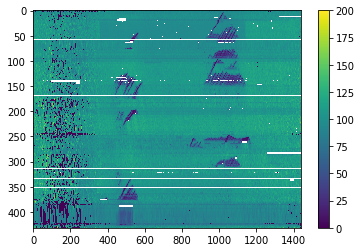

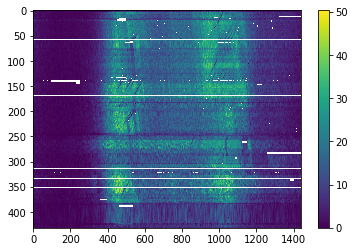

In [12]:
print(speeds.shape)
print(flows.shape)
print(minSpaceIndex)
print(maxSpaceIndex)
print(minTimeIndex)
print(maxTimeIndex)
matplotlib.pyplot.imshow(speeds, aspect = "auto")
matplotlib.pyplot.colorbar()
matplotlib.pyplot.show()
matplotlib.pyplot.imshow(flows, aspect = "auto")
matplotlib.pyplot.colorbar()
matplotlib.pyplot.show()

It may occur that a _BPS detector_ is out of order. In this case, no information from that location is known. As such, the _speed_ and _flow_ data may contain gaps and its boundaries may not be the same as the start and finish of the _road_. The horizontal lines of missing values in the plots above are due to _BPS detectors_ not working. These rows will be removed completely.

In [13]:
speedsWorkingDetectors, flowsWorkingDetectors, maskWorkingDetectors = congestionfinder.speedflow.removeMissingDetectors(speeds, flows) ## Do something with Mask

2018-01-08 11:18:09,434 - DEBUG - Starting removeMissingDetectors()
2018-01-08 11:18:09,434 - DEBUG - Ending removeMissingDetectors()


The following shows some details about the filtered _speeds_ and _flows_ arrays.

(419, 1440)
(419, 1440)
0.969907407407


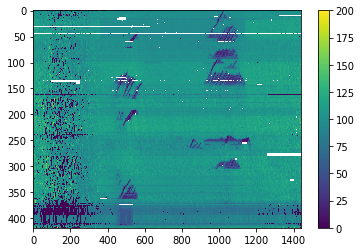

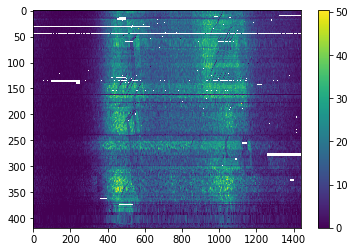

In [14]:
print(speedsWorkingDetectors.shape)
print(flowsWorkingDetectors.shape)
print(sum(maskWorkingDetectors) / (sum(maskWorkingDetectors) + sum(~maskWorkingDetectors)))
matplotlib.pyplot.imshow(speedsWorkingDetectors, aspect = "auto")
matplotlib.pyplot.colorbar()
matplotlib.pyplot.show()
matplotlib.pyplot.imshow(flowsWorkingDetectors, aspect = "auto")
matplotlib.pyplot.colorbar()
matplotlib.pyplot.show()

Not all _detection_ data is reliable or relevant. When the _flow_ is low, the measurements of average _speed_ are less accurate. Furthermore, with consistently low _flow_, there is no possibility for congestion. Low _flow_ occurs consistently at specific times, such as during the night. Therefore, these columns will be removed completely.

In [15]:
speedsHighFlow, flowsHighFlow, maskHighFlow = congestionfinder.speedflow.removeLowFlowTimes(speedsWorkingDetectors, flowsWorkingDetectors) ## Do something with Mask

2018-01-08 11:18:09,965 - DEBUG - Starting removeLowFlowTimes()
2018-01-08 11:18:09,981 - DEBUG - Ending removeLowFlowTimes()


The following shows some details about the filtered _speeds_ and _flows_ arrays.

(419, 806)
(419, 806)
0.559722222222


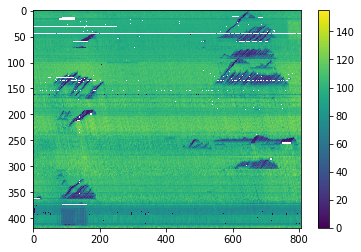

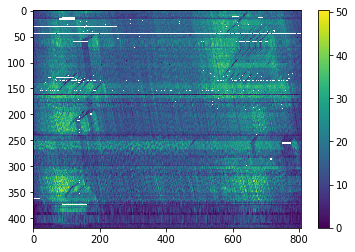

In [16]:
print(speedsHighFlow.shape)
print(flowsHighFlow.shape)
print(sum(maskHighFlow) / (sum(maskHighFlow) + sum(~maskHighFlow)))
matplotlib.pyplot.imshow(speedsHighFlow, aspect = "auto")
matplotlib.pyplot.colorbar()
matplotlib.pyplot.show()
matplotlib.pyplot.imshow(flowsHighFlow, aspect = "auto")
matplotlib.pyplot.colorbar()
matplotlib.pyplot.show()

### Congestion

_Speed_ and _flow_ data can be combined to devise a measure of _congestion_. Any value below 1 indicates _congestion_. The _speedThreshold_ and _flowThreshold_ are set in the _Properties_ above.

In [17]:
congestions = congestionfinder.congestion.parseSpeedFlowsToCongestions(speedsHighFlow, flowsHighFlow, speedThreshold, flowThreshold)

2018-01-08 11:18:10,449 - DEBUG - Starting parseSpeedFlowsToCongestions()
2018-01-08 11:18:10,449 - DEBUG - Ending parseSpeedFlowsToCongestions()


The following shows some details about the resulting _congestions_ arrays.

(419, 806)


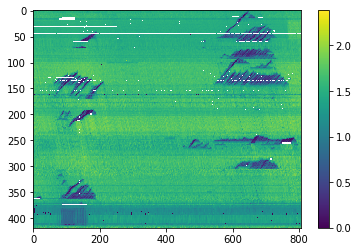

In [18]:
print(congestions.shape)
matplotlib.pyplot.imshow(congestions, aspect = "auto")
matplotlib.pyplot.colorbar()
matplotlib.pyplot.show()

This array still contains some missing values, which can occur when a _BPS detector_ is temporarily out of order. These cells will be imputed using an interpolation of neighbouring values.

In [19]:
congestionsWithoutMissingValues = congestionfinder.congestion.interpolateMissingValues(congestions)

2018-01-08 11:18:10,715 - DEBUG - Starting interpolateMissingValues()
2018-01-08 11:18:22,970 - DEBUG - Ending interpolateMissingValues()


The following shows some details about the imputed _congestions_ arrays.

(419, 806)


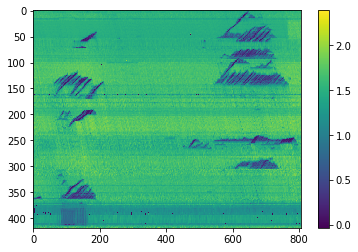

In [20]:
print(congestionsWithoutMissingValues.shape)
matplotlib.pyplot.imshow(congestionsWithoutMissingValues, aspect = "auto")
matplotlib.pyplot.colorbar()
matplotlib.pyplot.show()

The original _speed_ and _flow_ data were at a fine-grained level. _Congestion_ naturally occurs at a coarser level. Furthermore, while searching for _congestion_, is it important not to get thrown off by a single outlying value in the _speed_ or _flow_ data. Therefore, it is useful to smooth the _congestion_ array to a coarse-grained level. The _spaceSmoothing_ and _timeSmoothing_ are set in the _Properties_ above.

In [21]:
congestionsSmoothed = congestionfinder.congestion.applySmoothingFilter(congestionsWithoutMissingValues, spaceSmoothing, timeSmoothing)

2018-01-08 11:18:23,189 - DEBUG - Starting applySmoothingFilter()
2018-01-08 11:18:23,189 - DEBUG - Ending applySmoothingFilter()


The following shows some details about the smoothed _congestions_ arrays.

(419, 806)


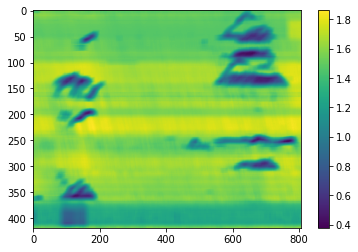

In [22]:
print(congestionsSmoothed.shape)
matplotlib.pyplot.imshow(congestionsSmoothed, aspect = "auto")
matplotlib.pyplot.colorbar()
matplotlib.pyplot.show()

### Patch Finder

To find regions of _congestion_ within the _congestions_ array, the _patch finder_ module will be used. The first step is to transform the _congestions_ array into a boolean array. _Congestion_ is defined as values below 1, which relates to the _speedThreshold_ and _flowThreshold_ set earlier.

In [23]:
congestionsBoolean = congestionsSmoothed < 1

The _patch finder_ module contains a function which will recursively look for _patches_ within the array.

In [24]:
congestionPatches = patchfinder.patch.findPatches(congestionsBoolean)

2018-01-08 11:18:23,439 - DEBUG - Starting findPatches()
2018-01-08 11:18:23,439 - DEBUG - Direction: 0
2018-01-08 11:18:23,439 - DEBUG - Starting scanForBoundaries()
2018-01-08 11:18:23,439 - DEBUG - Found start: 77
2018-01-08 11:18:23,439 - DEBUG - Found stop: 193
2018-01-08 11:18:23,454 - DEBUG - Found start: 480
2018-01-08 11:18:23,454 - DEBUG - Found stop: 491
2018-01-08 11:18:23,454 - DEBUG - Found start: 557
2018-01-08 11:18:23,454 - DEBUG - Found stop: 786
2018-01-08 11:18:23,454 - DEBUG - Ending scanForBoundaries()
2018-01-08 11:18:23,454 - DEBUG - Found patches: [[0, 418, 77, 193], [0, 418, 480, 491], [0, 418, 557, 786]]
2018-01-08 11:18:23,454 - DEBUG - length: 3| parentLength: 0
2018-01-08 11:18:23,454 - DEBUG - Scanning children...
2018-01-08 11:18:23,454 - DEBUG - Child: 0
2018-01-08 11:18:23,454 - DEBUG -   Starting findPatches()
2018-01-08 11:18:23,470 - DEBUG -   Direction: 1
2018-01-08 11:18:23,470 - DEBUG -   Starting scanForBoundaries()
2018-01-08 11:18:23,470 - DEB

2018-01-08 11:18:23,595 - DEBUG -       Ending scanForBoundaries()
2018-01-08 11:18:23,595 - DEBUG -       Found patches: [[381, 413, 84, 158]]
2018-01-08 11:18:23,595 - DEBUG -       length: 1| parentLength: 1
2018-01-08 11:18:23,611 - DEBUG -       Done: xStart: 381 | xEnd: 413 | yStart: 84 | yEnd: 158
2018-01-08 11:18:23,611 - DEBUG -       Ending findPatches()
2018-01-08 11:18:23,611 - DEBUG -     Ending findPatches()
2018-01-08 11:18:23,611 - DEBUG -   Ending findPatches()
2018-01-08 11:18:23,611 - DEBUG - Child: 1
2018-01-08 11:18:23,611 - DEBUG -   Starting findPatches()
2018-01-08 11:18:23,611 - DEBUG -   Direction: 1
2018-01-08 11:18:23,611 - DEBUG -   Starting scanForBoundaries()
2018-01-08 11:18:23,611 - DEBUG -   Found start: 250
2018-01-08 11:18:23,611 - DEBUG -   Found stop: 255
2018-01-08 11:18:23,611 - DEBUG -   Ending scanForBoundaries()
2018-01-08 11:18:23,611 - DEBUG -   Found patches: [[250, 255, 480, 491]]
2018-01-08 11:18:23,611 - DEBUG -   length: 1| parentLength

2018-01-08 11:18:23,751 - DEBUG -       length: 1| parentLength: 1
2018-01-08 11:18:23,751 - DEBUG -       Done: xStart: 122 | xEnd: 144 | yStart: 557 | yEnd: 752
2018-01-08 11:18:23,751 - DEBUG -       Ending findPatches()
2018-01-08 11:18:23,751 - DEBUG -     Ending findPatches()
2018-01-08 11:18:23,751 - DEBUG -   Child: 4
2018-01-08 11:18:23,751 - DEBUG -     Starting findPatches()
2018-01-08 11:18:23,751 - DEBUG -     Direction: 0
2018-01-08 11:18:23,751 - DEBUG -     Starting scanForBoundaries()
2018-01-08 11:18:23,751 - DEBUG -     Found start: 14
2018-01-08 11:18:23,751 - DEBUG -     Found stop: 48
2018-01-08 11:18:23,767 - DEBUG -     Found start: 53
2018-01-08 11:18:23,767 - DEBUG -     Found stop: 59
2018-01-08 11:18:23,767 - DEBUG -     Found start: 61
2018-01-08 11:18:23,767 - DEBUG -     Found stop at end.
2018-01-08 11:18:23,767 - DEBUG -     Ending scanForBoundaries()
2018-01-08 11:18:23,767 - DEBUG -     Found patches: [[242, 256, 571, 605], [242, 256, 610, 616], [242,

The function has returned the following _patches_.

In [25]:
for congestionPatch in congestionPatches:
    print(congestionPatch)

xStart: 46 | xEnd: 61 | yStart: 148 | yEnd: 186
xStart: 124 | xEnd: 169 | yStart: 77 | yEnd: 193
xStart: 192 | xEnd: 213 | yStart: 123 | yEnd: 182
xStart: 338 | xEnd: 363 | yStart: 90 | yEnd: 183
xStart: 381 | xEnd: 413 | yStart: 84 | yEnd: 158
xStart: 250 | xEnd: 255 | yStart: 480 | yEnd: 491
xStart: 9 | xEnd: 22 | yStart: 616 | yEnd: 644
xStart: 33 | xEnd: 60 | yStart: 572 | yEnd: 713
xStart: 75 | xEnd: 106 | yStart: 595 | yEnd: 715
xStart: 122 | xEnd: 144 | yStart: 557 | yEnd: 752
xStart: 250 | xEnd: 253 | yStart: 571 | yEnd: 605
xStart: 251 | xEnd: 251 | yStart: 610 | yEnd: 616
xStart: 242 | xEnd: 256 | yStart: 618 | yEnd: 786
xStart: 289 | xEnd: 304 | yStart: 623 | yEnd: 729


To visualise the result, the _patches_ can be plotted together with the smoothed _congestions_ array and its boolean representation.

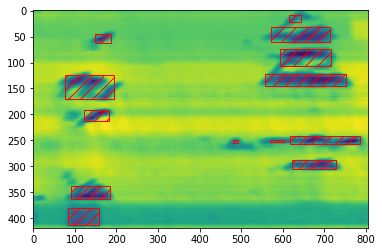

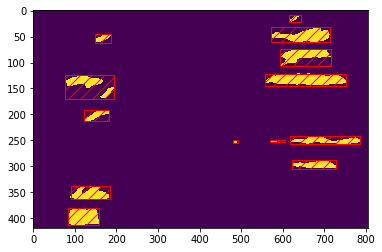

In [26]:
congestionfinder.congestion.plotCongestionsWithPatches(congestionsSmoothed, congestionPatches)
congestionfinder.congestion.plotCongestionsWithPatches(congestionsBoolean, congestionPatches)

As shown in the plots above, there are some small patches of _congestion_. These are not of interest to us and can be removed. The _patchSizeThreshold_ is defined in the _Properties_ above.

In [27]:
congestionPatchesFiltered = patchfinder.patch.filterLargePatches(congestionPatches, patchSizeThreshold)

2018-01-08 11:18:24,517 - DEBUG - Starting filterLargePatches()
2018-01-08 11:18:24,517 - DEBUG - Ending filterLargePatches()


The resulting list of _patches_ is shown below.

In [28]:
for congestionPatch in congestionPatchesFiltered:
    print(congestionPatch)

xStart: 124 | xEnd: 169 | yStart: 77 | yEnd: 193
xStart: 192 | xEnd: 213 | yStart: 123 | yEnd: 182
xStart: 338 | xEnd: 363 | yStart: 90 | yEnd: 183
xStart: 381 | xEnd: 413 | yStart: 84 | yEnd: 158
xStart: 33 | xEnd: 60 | yStart: 572 | yEnd: 713
xStart: 75 | xEnd: 106 | yStart: 595 | yEnd: 715
xStart: 122 | xEnd: 144 | yStart: 557 | yEnd: 752
xStart: 242 | xEnd: 256 | yStart: 618 | yEnd: 786
xStart: 289 | xEnd: 304 | yStart: 623 | yEnd: 729


To visualise the result, the _patches_ can, again, be plotted together with the smoothed _congestions_ array and its boolean representation.

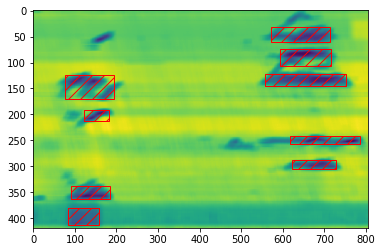

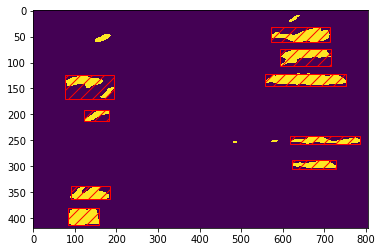

In [29]:
congestionfinder.congestion.plotCongestionsWithPatches(congestionsSmoothed, congestionPatchesFiltered)
congestionfinder.congestion.plotCongestionsWithPatches(congestionsBoolean, congestionPatchesFiltered)

### Speed and Flows (part 2)

We wil now use the _masks_ from the missing detectors and the low _flow_ times to reconstruct the _patches_ as they would have been before the filtering.

In [30]:
speedFlowPatches = congestionfinder.speedflow.unmaskPatches(congestionPatchesFiltered, maskWorkingDetectors, maskHighFlow)

2018-01-03 16:01:06,714 - DEBUG - Starting unmaskPatches()
2018-01-03 16:01:06,714 - DEBUG - Ending unmaskPatches()


The resulting list of patches is shown below.

In [31]:
for speedFlowPatch in speedFlowPatches:
    print(speedFlowPatch)

xStart: 128 | xEnd: 174 | yStart: 452 | yEnd: 568
xStart: 198 | xEnd: 219 | yStart: 498 | yEnd: 557
xStart: 350 | xEnd: 376 | yStart: 465 | yEnd: 558
xStart: 394 | xEnd: 426 | yStart: 459 | yEnd: 533
xStart: 35 | xEnd: 63 | yStart: 947 | yEnd: 1088
xStart: 79 | xEnd: 110 | yStart: 970 | yEnd: 1090
xStart: 126 | xEnd: 148 | yStart: 932 | yEnd: 1127
xStart: 248 | xEnd: 262 | yStart: 993 | yEnd: 1161
xStart: 295 | xEnd: 310 | yStart: 998 | yEnd: 1104


Let's now plot the original _speeds_ array with the patches on top.

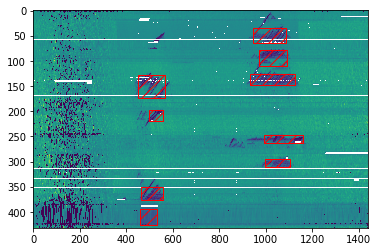

In [32]:
congestionfinder.congestion.plotCongestionsWithPatches(speeds, speedFlowPatches)

We can also add margins to the _patches_. This is important to undo some of the effect of the coarse-graining which occured when the _congestion_ array was smoothed. To ensure that the function does not create unrealistic margins, the original boundaries of the _speed_ and _flow_ arrays need to be used.

In [33]:
speedFlowPatchesWithMargins = congestionfinder.speedflow.addMargins(speedFlowPatches, marginSpace, marginTime, minSpaceIndex, maxSpaceIndex, minTimeIndex, maxTimeIndex)

2018-01-03 16:01:06,979 - DEBUG - Starting addMargins()
2018-01-03 16:01:06,979 - DEBUG - Ending addMargins()


The resulting list of _patches_ is shown below.

In [34]:
for speedFlowPatch in speedFlowPatchesWithMargins:
    print(speedFlowPatch)

xStart: 118 | xEnd: 184 | yStart: 432 | yEnd: 588
xStart: 188 | xEnd: 229 | yStart: 478 | yEnd: 577
xStart: 340 | xEnd: 386 | yStart: 445 | yEnd: 578
xStart: 384 | xEnd: 431 | yStart: 439 | yEnd: 553
xStart: 25 | xEnd: 73 | yStart: 927 | yEnd: 1108
xStart: 69 | xEnd: 120 | yStart: 950 | yEnd: 1110
xStart: 116 | xEnd: 158 | yStart: 912 | yEnd: 1147
xStart: 238 | xEnd: 272 | yStart: 973 | yEnd: 1181
xStart: 285 | xEnd: 320 | yStart: 978 | yEnd: 1124


Let's, again, plot the original _speeds_ array with the patches on top.

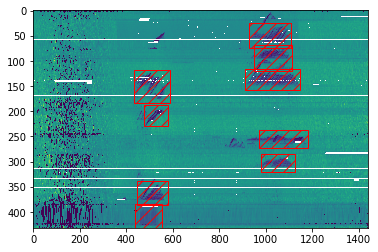

In [35]:
congestionfinder.congestion.plotCongestionsWithPatches(speeds, speedFlowPatchesWithMargins)

Finally, let's write the _speed_ and _flow_ values for each _patch_ to disk.

In [36]:
congestionfinder.speedflow.writeSpeedsAndFlowsToCSV(speeds, flows, speedFlowPatchesWithMargins, outputDirectory, date, road)

2018-01-03 16:01:07,245 - DEBUG - Starting writeSpeedsAndFlowsToCSV()
2018-01-03 16:01:07,761 - DEBUG - Ending writeSpeedsAndFlowsToCSV()


End of _Jupyter Notebook_.